<a href="https://colab.research.google.com/github/ChecinskiBartlomiej/UM/blob/main/UM_hw_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment – Adversarial Examples**

In this assignment, you will explore how small (invisible to humans) changes to real digits can _fool_ the CNN into misclassifying them, even though the changes are imperceptible to humans.



## Task 1 – CNN Dreams: Last Homework Assignment Revisited

Re-run the input optimization process (for NN dreams) from the previous MLP-class homework assignment, but this time using the **LeNet-5 CNN model** we trained in this class.


1. Starting from ten random noise images, optimize the input so that each image is classified with high confidence as one of the digits 0 through 9.
2. Include an **L2 penalty** on the input to keep the images visually closer to realistic digits. Use a range of penalty strengths (e.g., $\lambda_{l2}$ = 0, and then 0.01 through 10.0).
3. Compare the generated images (with and without L2 penalty) to those generated by the MLP:
   - Are they more or less readable?
   - Do they resemble real MNIST digits more closely or less?
   - Why do you think that happens? Consider the CNN’s inductive biases and architectural properties.

Use `cross_entropy_loss + lambda_l2 * input.pow(2).mean()` as your objective.

Reuse your code: visualize confidence evolution during optimization and generate image grids and (optionally) animations showing how the inputs evolve.


## Task 2 – Adversarial Examples: Fooling LeNet-5

This is the core focus of the assignment.

Using a batch of **real MNIST digits** (e.g., nine examples per class), craft **adversarial examples** by adding subtle, trained noise to the input images. Your goal is to:

- **Keep the human-perceived digit the same** (e.g., a "7" should still look like a "7"),
- But **cause LeNet-5 to misclassify it** – as every other class different from the original, hence nine examples per class.

### Objective
For each image $x$ and its true label $y$, learn a perturbation $\delta$ such that:

- $\text{LeNet5}(x + \delta) = y_{\text{wrong}} $,
- and $ \|\delta\|_2 $ is as small as possible (penalize large perturbations), to keep $x + \delta$ *look* like $x$ for humans.

### Optimization
Use gradient-based optimization on $\delta$ (the noise), while keeping the network weights frozen. Your loss might look like:

```
loss = cross_entropy(model(x + delta), target_wrong_class) +
       lambda_l2 * delta.pow(2).mean()
```

Tune the $\lambda_{l2}$ to find the best range.

### Deliverables for the Second Task
- Select some best examples, showing the original digit and its (correct) classification and the perturbed digit (hopefully, still looking the same to humans) and how it gets misclassified. Show them side by side.
- Report:
  - Success rate of attacks (it doesn't need to be very formal),
  - Effect of $\lambda_{l2}$ on visibility of the noise and success of misclassification,
  - Example image grids and confidence plots.



## Deliverables for the Homework Assignment
- A Google Colab notebook with:
  - Complete implementation for both tasks.
  - Visualizations and animations (animations are optional but encouraged).
  - Clear written analysis of your findings.
- Upload the notebook and results to your GitHub repository for the course.
- Include a link to the notebook and video (if applicable) in the `README.md`.
- In the notebook, include “Open in Colab” badge so it can be launched directly.

For the first task let's train digit recognizer on LeNet architecture and then optimize its input.

Working on cuda
epoch: 0 batch: 0 current batch loss: 2.322495222091675
epoch: 0 batch: 1 current batch loss: 2.4036622047424316
epoch: 0 batch: 2 current batch loss: 2.323767900466919
epoch: 0 batch: 3 current batch loss: 2.3132734298706055
epoch: 0 batch: 4 current batch loss: 2.335312843322754
epoch: 0 batch: 5 current batch loss: 2.3352468013763428
epoch: 0 batch: 6 current batch loss: 2.3116488456726074
epoch: 0 batch: 7 current batch loss: 2.305478096008301
epoch: 0 batch: 8 current batch loss: 2.3011538982391357
epoch: 0 batch: 9 current batch loss: 2.3059043884277344
epoch: 0 batch: 10 current batch loss: 2.297650098800659
epoch: 0 batch: 11 current batch loss: 2.2989583015441895
epoch: 0 batch: 12 current batch loss: 2.288923501968384
epoch: 0 batch: 13 current batch loss: 2.279111385345459
epoch: 0 batch: 14 current batch loss: 2.268339157104492
epoch: 0 batch: 15 current batch loss: 2.2599658966064453
epoch: 0 batch: 16 current batch loss: 2.247720241546631
epoch: 0 batch: 1

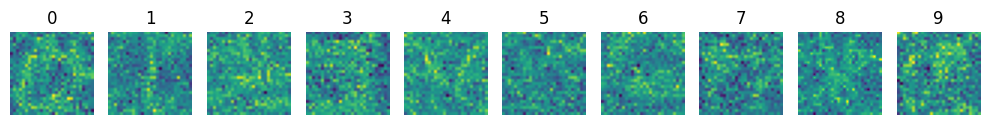

Finished training with lambda = 0
Training with lambda = 0.001
epoch: 0 current loss: 5.734838962554932
epoch: 1000 current loss: 0.007419062778353691
epoch: 2000 current loss: 0.003539599943906069
epoch: 3000 current loss: 0.0023442180827260017
epoch: 4000 current loss: 0.0018197131576016545
epoch: 5000 current loss: 0.0015316606732085347
epoch: 6000 current loss: 0.0013585514388978481
epoch: 7000 current loss: 0.0012359835673123598
epoch: 8000 current loss: 0.0011376708280295134
epoch: 9000 current loss: 0.0010505138197913766
epoch: 10000 current loss: 0.0009636693866923451
epoch: 11000 current loss: 0.0008680977625772357
epoch: 12000 current loss: 0.0007608727901242673
epoch: 13000 current loss: 0.000642749946564436
epoch: 14000 current loss: 0.0005201841122470796
epoch: 15000 current loss: 0.00040077653829939663
epoch: 16000 current loss: 0.0002937734534498304
epoch: 17000 current loss: 0.00020785181550309062
epoch: 18000 current loss: 0.0001463600929128006
epoch: 19000 current los

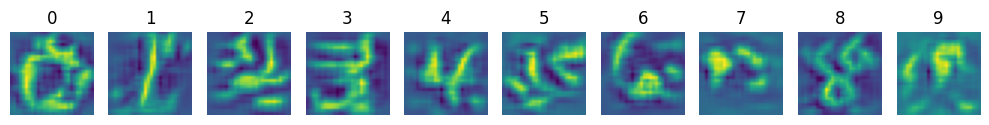

Finished training with lambda = 0.001
Training with lambda = 0.01
epoch: 0 current loss: 5.745353698730469
epoch: 1000 current loss: 0.015856333076953888
epoch: 2000 current loss: 0.012132324278354645
epoch: 3000 current loss: 0.010862424969673157
epoch: 4000 current loss: 0.010037146508693695
epoch: 5000 current loss: 0.009275135584175587
epoch: 6000 current loss: 0.008435462601482868
epoch: 7000 current loss: 0.00747681874781847
epoch: 8000 current loss: 0.0063908882439136505
epoch: 9000 current loss: 0.005202111788094044
epoch: 10000 current loss: 0.003984314389526844
epoch: 11000 current loss: 0.0028363552410155535
epoch: 12000 current loss: 0.001855652080848813
epoch: 13000 current loss: 0.0011060773395001888
epoch: 14000 current loss: 0.0006089479429647326
epoch: 15000 current loss: 0.00033170462120324373
epoch: 16000 current loss: 0.00020573678193613887
epoch: 17000 current loss: 0.00016034375585149974
epoch: 18000 current loss: 0.00014725790242664516
epoch: 19000 current loss: 

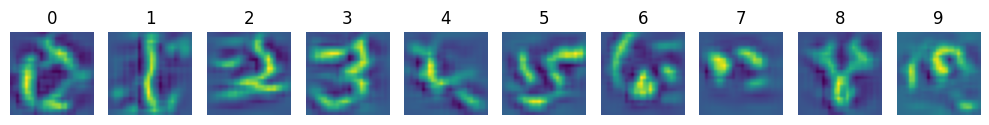

Finished training with lambda = 0.01
Training with lambda = 0.1
epoch: 0 current loss: 4.480675220489502
epoch: 1000 current loss: 0.09112861007452011
epoch: 2000 current loss: 0.07601310312747955
epoch: 3000 current loss: 0.06329017877578735
epoch: 4000 current loss: 0.05099419131875038
epoch: 5000 current loss: 0.039004500955343246
epoch: 6000 current loss: 0.027828561142086983
epoch: 7000 current loss: 0.018209662288427353
epoch: 8000 current loss: 0.010759972035884857
epoch: 9000 current loss: 0.005669348407536745
epoch: 10000 current loss: 0.0027069863863289356
epoch: 11000 current loss: 0.0012936010025441647
epoch: 12000 current loss: 0.0007548138964921236
epoch: 13000 current loss: 0.000589092553127557
epoch: 14000 current loss: 0.0005539371632039547
epoch: 15000 current loss: 0.0005416274652816355
epoch: 16000 current loss: 0.000540670589543879
epoch: 17000 current loss: 0.0005405357806012034
epoch: 18000 current loss: 0.0005405217525549233
epoch: 19000 current loss: 0.00054054

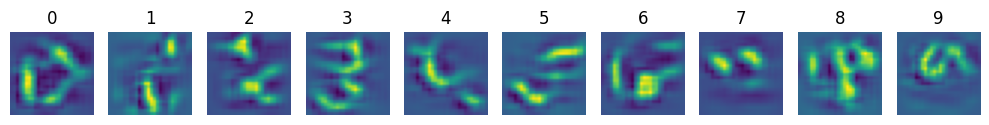

Finished training with lambda = 0.1
Training with lambda = 1.0
epoch: 0 current loss: 7.216434478759766
epoch: 1000 current loss: 0.7510722875595093
epoch: 2000 current loss: 0.46562594175338745
epoch: 3000 current loss: 0.26135045289993286
epoch: 4000 current loss: 0.13148190081119537
epoch: 5000 current loss: 0.05859971046447754
epoch: 6000 current loss: 0.023268654942512512
epoch: 7000 current loss: 0.008844501338899136
epoch: 8000 current loss: 0.004194436129182577
epoch: 9000 current loss: 0.0031026448123157024
epoch: 10000 current loss: 0.00292679900303483
epoch: 11000 current loss: 0.0028860222082585096
epoch: 12000 current loss: 0.0028701615519821644
epoch: 13000 current loss: 0.002870091237127781
epoch: 14000 current loss: 0.002870128722861409
epoch: 15000 current loss: 0.002870110794901848
epoch: 16000 current loss: 0.0028701242990791798
epoch: 17000 current loss: 0.0028701198752969503
epoch: 18000 current loss: 0.002870126161724329
epoch: 19000 current loss: 0.00287011452019

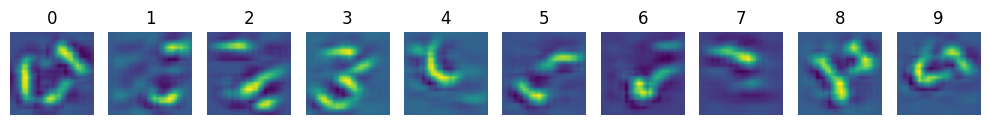

Finished training with lambda = 1.0
Training with lambda = 10.0
epoch: 0 current loss: 17.58561134338379
epoch: 1000 current loss: 3.6345810890197754
epoch: 2000 current loss: 1.0340465307235718
epoch: 3000 current loss: 0.25364118814468384
epoch: 4000 current loss: 0.06367659568786621
epoch: 5000 current loss: 0.026933375746011734
epoch: 6000 current loss: 0.021273652091622353
epoch: 7000 current loss: 0.02027987316250801
epoch: 8000 current loss: 0.019923126325011253
epoch: 9000 current loss: 0.019921788945794106
epoch: 10000 current loss: 0.019921787083148956
epoch: 11000 current loss: 0.019921837374567986
epoch: 12000 current loss: 0.0199218038469553
epoch: 13000 current loss: 0.01992179825901985
epoch: 14000 current loss: 0.01992177963256836
epoch: 15000 current loss: 0.01992182619869709
epoch: 16000 current loss: 0.019921783357858658
epoch: 17000 current loss: 0.019921816885471344
epoch: 18000 current loss: 0.019921768456697464
epoch: 19000 current loss: 0.019921800121665
epoch: 

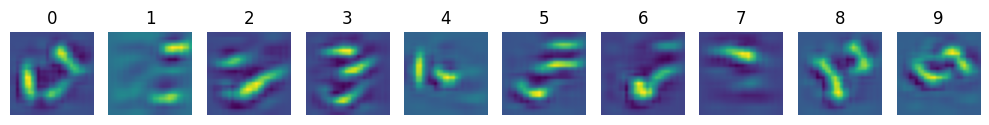

Finished training with lambda = 10.0


In [10]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F


transform = torchvision.transforms.Compose(
    [ torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize((0.1307), (0.3081))])

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=2048,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1,
                                         shuffle=False)

class LeNet5(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.sigmoid = torch.nn.Sigmoid()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2, stride=1)
        self.pool = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0, stride=1)
        self.flatten = torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(16*5*5, 120)
        self.linear2 = torch.nn.Linear(120,84)
        self.linear3 = torch.nn.Linear(84,10)

    def forward(self, x):      # (B, 1, 28, 28)
        x = self.conv1(x)      # (B, 6, 28, 28)
        x = self.sigmoid(x)    # (B, 6, 28, 28)
        x = self.pool(x)       # (B, 6, 14, 14)
        x = self.conv2(x)      # (B, 16, 10, 10)
        x = self.sigmoid(x)    # (B, 16, 10, 10)
        x = self.pool(x)       # (B, 16, 5, 5)
        x = self.flatten(x)    # (B, 16*5*5)
        x = self.linear1(x)    # (B, 120)
        x = self.sigmoid(x)    # (B, 120)
        x = self.linear2(x)    # (B, 84)
        x = self.sigmoid(x)    # (B, 84)
        x = self.linear3(x)    # (B, 10)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Working on {device}")

net = LeNet5().to(device)
optimizer = torch.optim.Adam(net.parameters(), 0.01)

# Trian digit recognizer.
net.train()
for epoch in range(16):

    for batch, data in enumerate(trainloader):
        batch_inputs, batch_labels = data

        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()
        batch_outputs = net(batch_inputs)
        loss = F.cross_entropy(batch_outputs, batch_labels, reduction = "mean")
        print("epoch:", epoch, "batch:", batch, "current batch loss:", loss.item())
        loss.backward()
        optimizer.step()

# Check accuracy on test data.
good = 0
wrong = 0

net.eval()
with torch.no_grad():
    for batch, data in enumerate(testloader):
        datapoint, label = data

        prediction = net(datapoint.to(device))
        classification = torch.argmax(prediction)

        if classification.item() == label.item():
            good += 1
        else:
            wrong += 1

print("accuracy = ", good/(good+wrong))

# Function for optimizing inputs of digit recognizer.
def train(l, iterations):
    samples = torch.randn(10, 1, 28, 28, device=device, requires_grad=True)
    mean = torch.tensor(0.1307, device=device).view(1,1,1,1)
    std  = torch.tensor(0.3081, device=device).view(1,1,1,1)

    labels = torch.arange(10, device=device)
    optimizer2 = torch.optim.Adam([samples], 0.001)
    net.eval()
    for epoch in range(iterations):
        optimizer2.zero_grad()
        normed = (samples - mean) / std
        logits = net(normed)
        loss2 = torch.nn.functional.cross_entropy(logits, labels, reduction="mean") + l * samples.pow(2).mean()
        if epoch % 1000 == 0:
            print("iteration:", epoch, "current loss:", loss2.item())
        loss2.backward()
        optimizer2.step()
    return samples

# Function for plotting inputs of digit recognizer.
def plot_images(images):
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))
    for i, ax in enumerate(axes):
        img = images[i].squeeze().cpu().detach()
        ax.imshow(img)
        ax.set_title(f"{i}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Train and plot for different lambdas.
iterations = 30000
lambda_values = [0, 0.001, 0.01, 0.1, 1.0, 10.0]
for l in lambda_values:
    print(f"Training with lambda = {l}")
    images = train(l, iterations)
    plot_images(images)
    print(f"Finished training with lambda = {l}")

ODPOWIEDZI NA PYTANIA

In the second task, I will select 90 distinct MNIST test images (9 examples of each digit from 0 to 9) and optimize an individual perturbation for each one. I will then optimize a perturbation tensor—one noise per example—so that, when added to these images, it causes the classifier to predict the wrong digit, even though each perturbed image remains visually indistinguishable from its original.

Training with lambda = 0
iter 000  misclas. rate =  0.0%   loss=11.901
iter 100  misclas. rate = 100.0%   loss=0.004
iter 200  misclas. rate = 100.0%   loss=0.002
iter 300  misclas. rate = 100.0%   loss=0.002
iter 400  misclas. rate = 100.0%   loss=0.001
iter 500  misclas. rate = 100.0%   loss=0.001
iter 600  misclas. rate = 100.0%   loss=0.001
iter 700  misclas. rate = 100.0%   loss=0.001
iter 800  misclas. rate = 100.0%   loss=0.001
iter 900  misclas. rate = 100.0%   loss=0.001

Final attack success rate: 100.0%


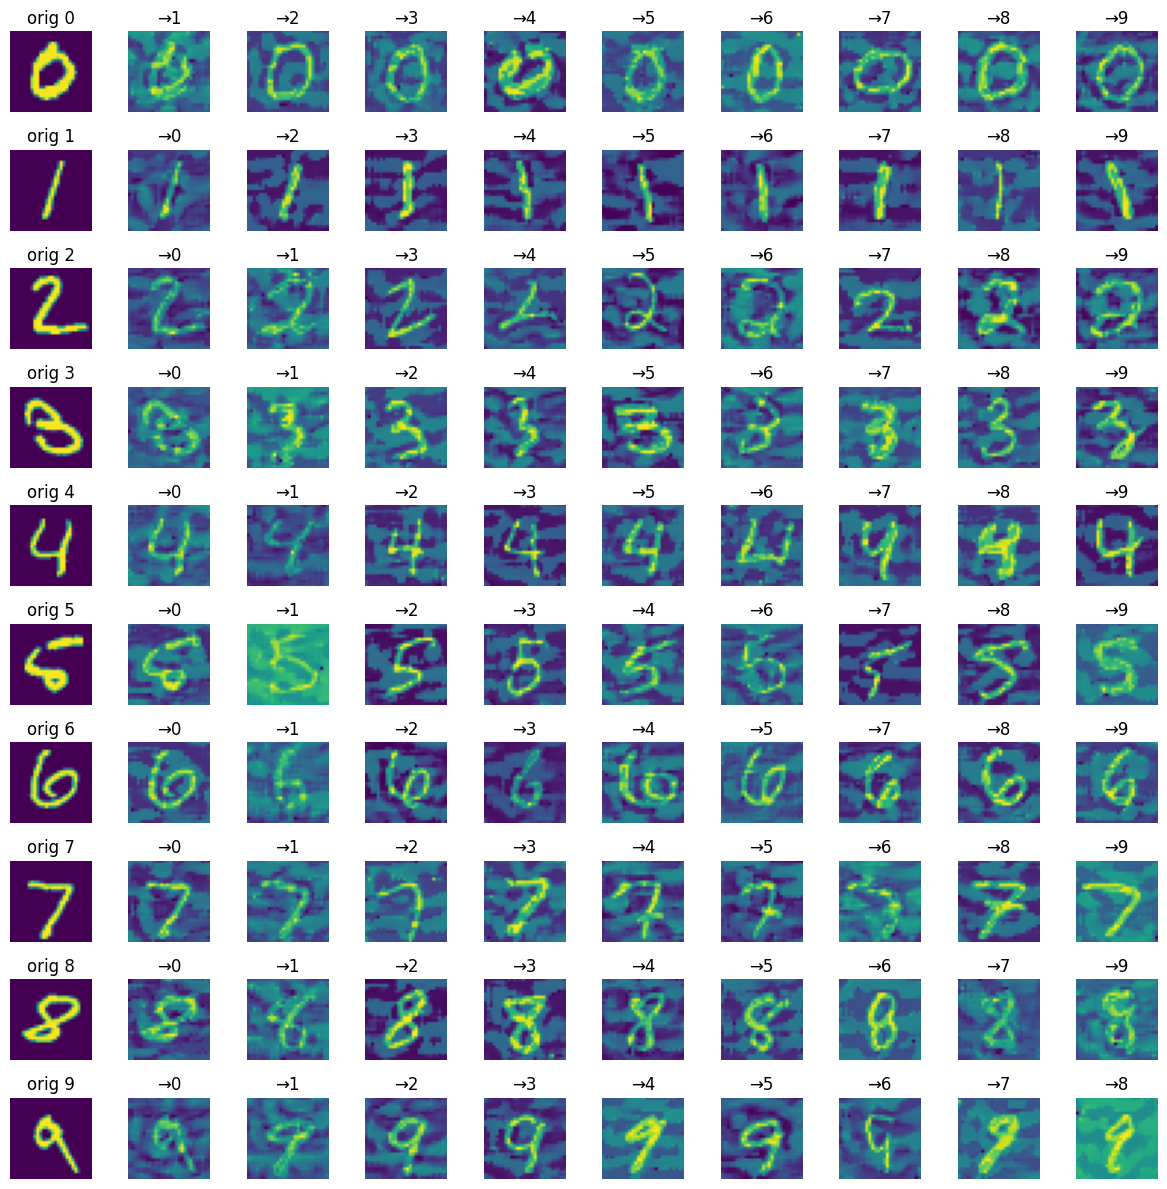

Finished training with lambda = 0
Training with lambda = 0.001
iter 000  misclas. rate =  0.0%   loss=11.901
iter 100  misclas. rate = 100.0%   loss=0.005
iter 200  misclas. rate = 100.0%   loss=0.003
iter 300  misclas. rate = 100.0%   loss=0.002
iter 400  misclas. rate = 100.0%   loss=0.002
iter 500  misclas. rate = 100.0%   loss=0.002
iter 600  misclas. rate = 100.0%   loss=0.002
iter 700  misclas. rate = 100.0%   loss=0.001
iter 800  misclas. rate = 100.0%   loss=0.001
iter 900  misclas. rate = 100.0%   loss=0.001

Final attack success rate: 100.0%


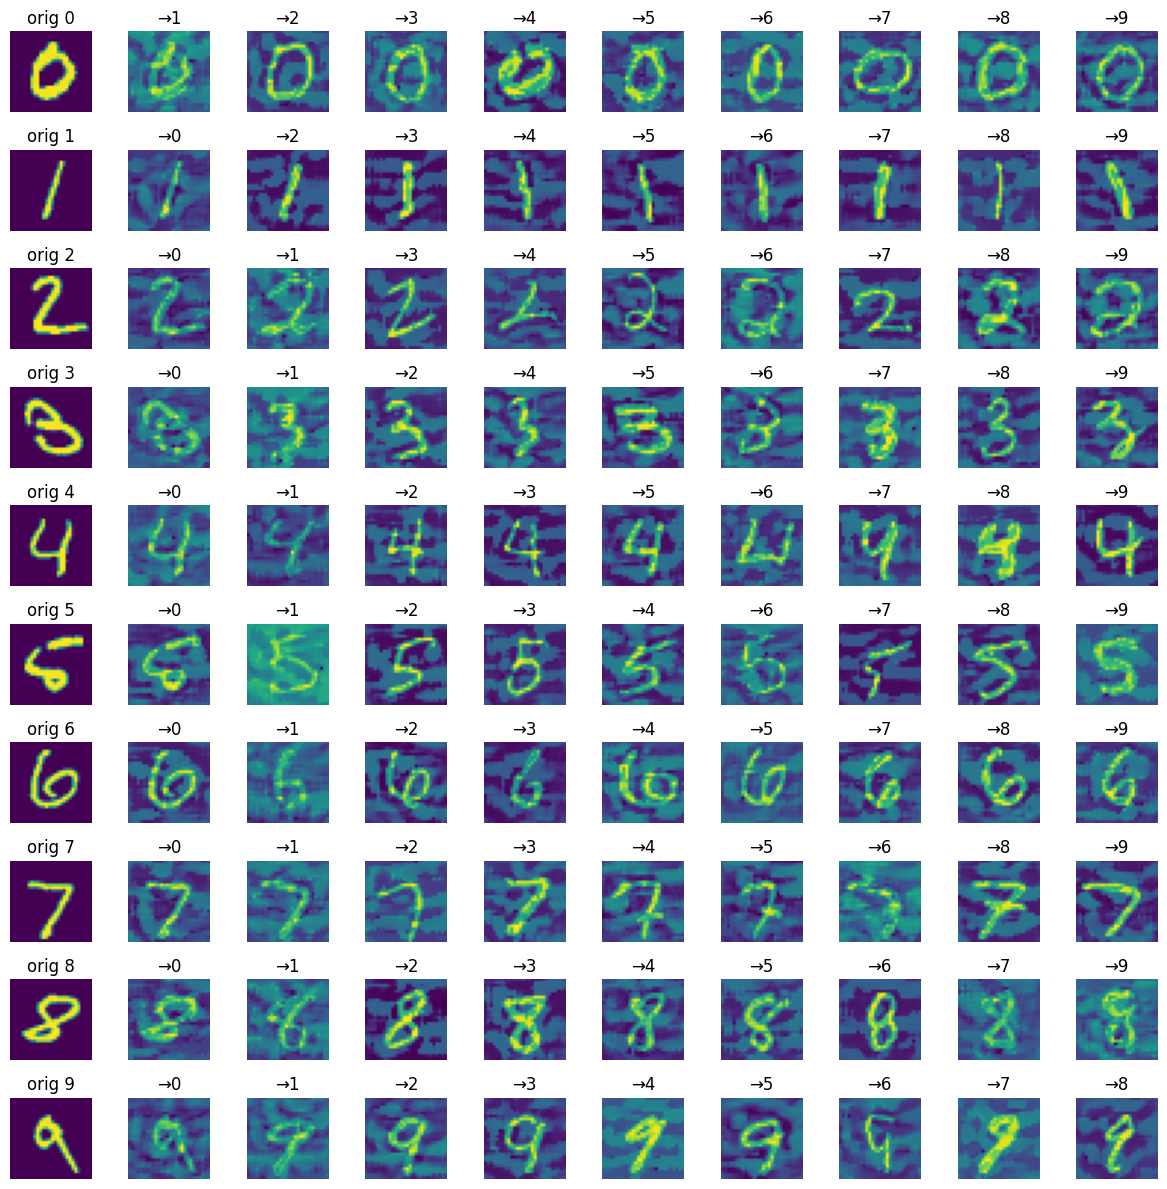

Finished training with lambda = 0.001
Training with lambda = 0.01
iter 000  misclas. rate =  0.0%   loss=11.901
iter 100  misclas. rate = 100.0%   loss=0.010
iter 200  misclas. rate = 100.0%   loss=0.007
iter 300  misclas. rate = 100.0%   loss=0.007
iter 400  misclas. rate = 100.0%   loss=0.006
iter 500  misclas. rate = 100.0%   loss=0.006
iter 600  misclas. rate = 100.0%   loss=0.005
iter 700  misclas. rate = 100.0%   loss=0.005
iter 800  misclas. rate = 100.0%   loss=0.004
iter 900  misclas. rate = 100.0%   loss=0.004

Final attack success rate: 100.0%


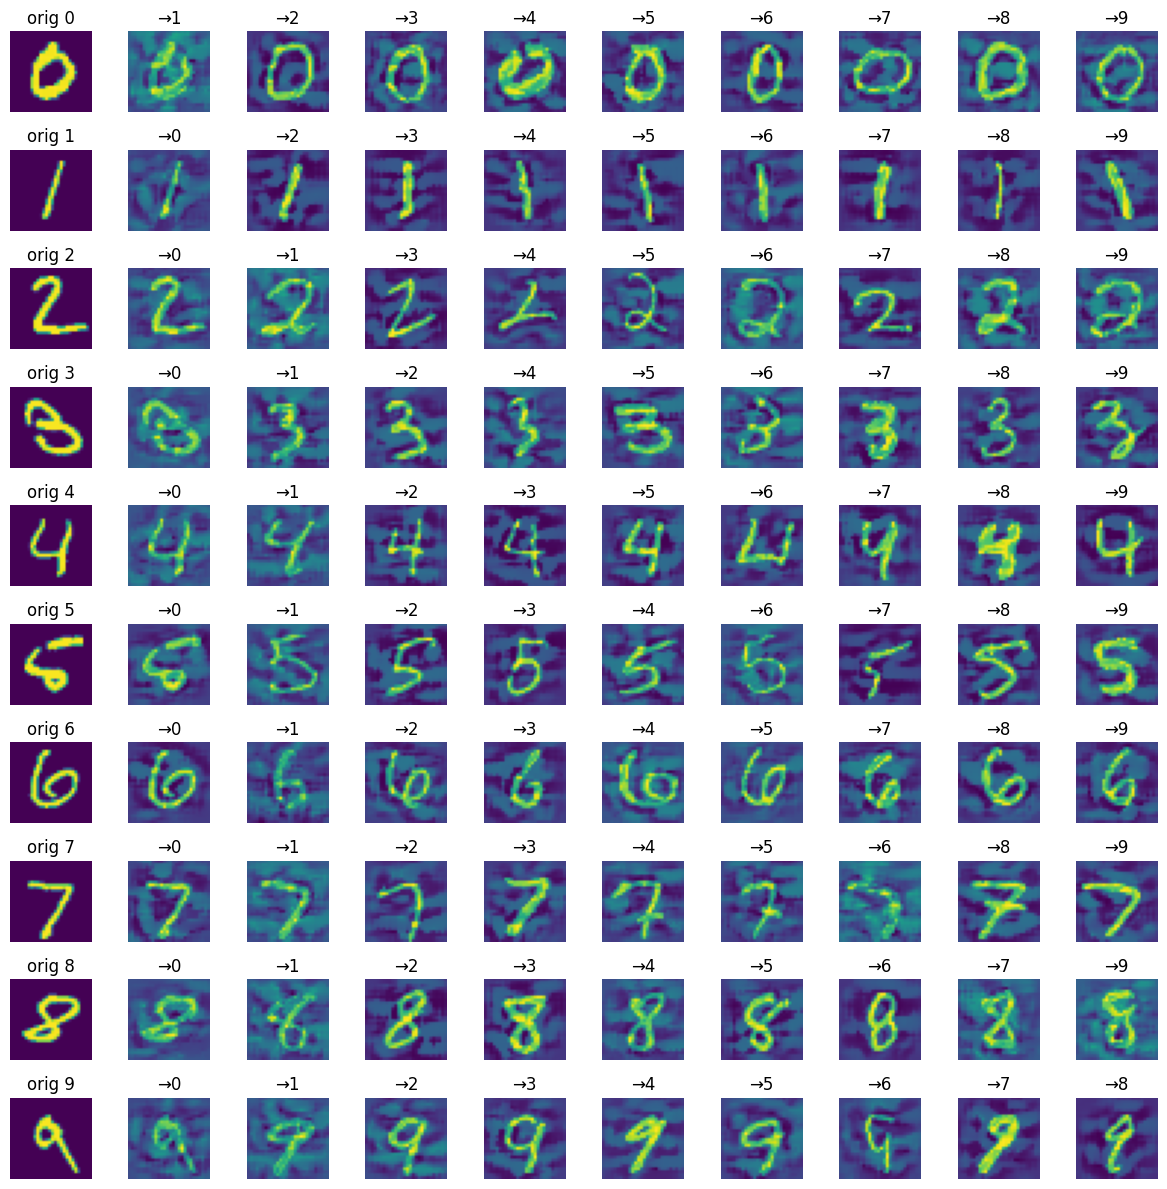

Finished training with lambda = 0.01
Training with lambda = 0.1
iter 000  misclas. rate =  0.0%   loss=11.901
iter 100  misclas. rate = 100.0%   loss=0.048
iter 200  misclas. rate = 100.0%   loss=0.035
iter 300  misclas. rate = 100.0%   loss=0.026
iter 400  misclas. rate = 100.0%   loss=0.021
iter 500  misclas. rate = 100.0%   loss=0.017
iter 600  misclas. rate = 100.0%   loss=0.014
iter 700  misclas. rate = 100.0%   loss=0.013
iter 800  misclas. rate = 100.0%   loss=0.012
iter 900  misclas. rate = 100.0%   loss=0.011

Final attack success rate: 100.0%


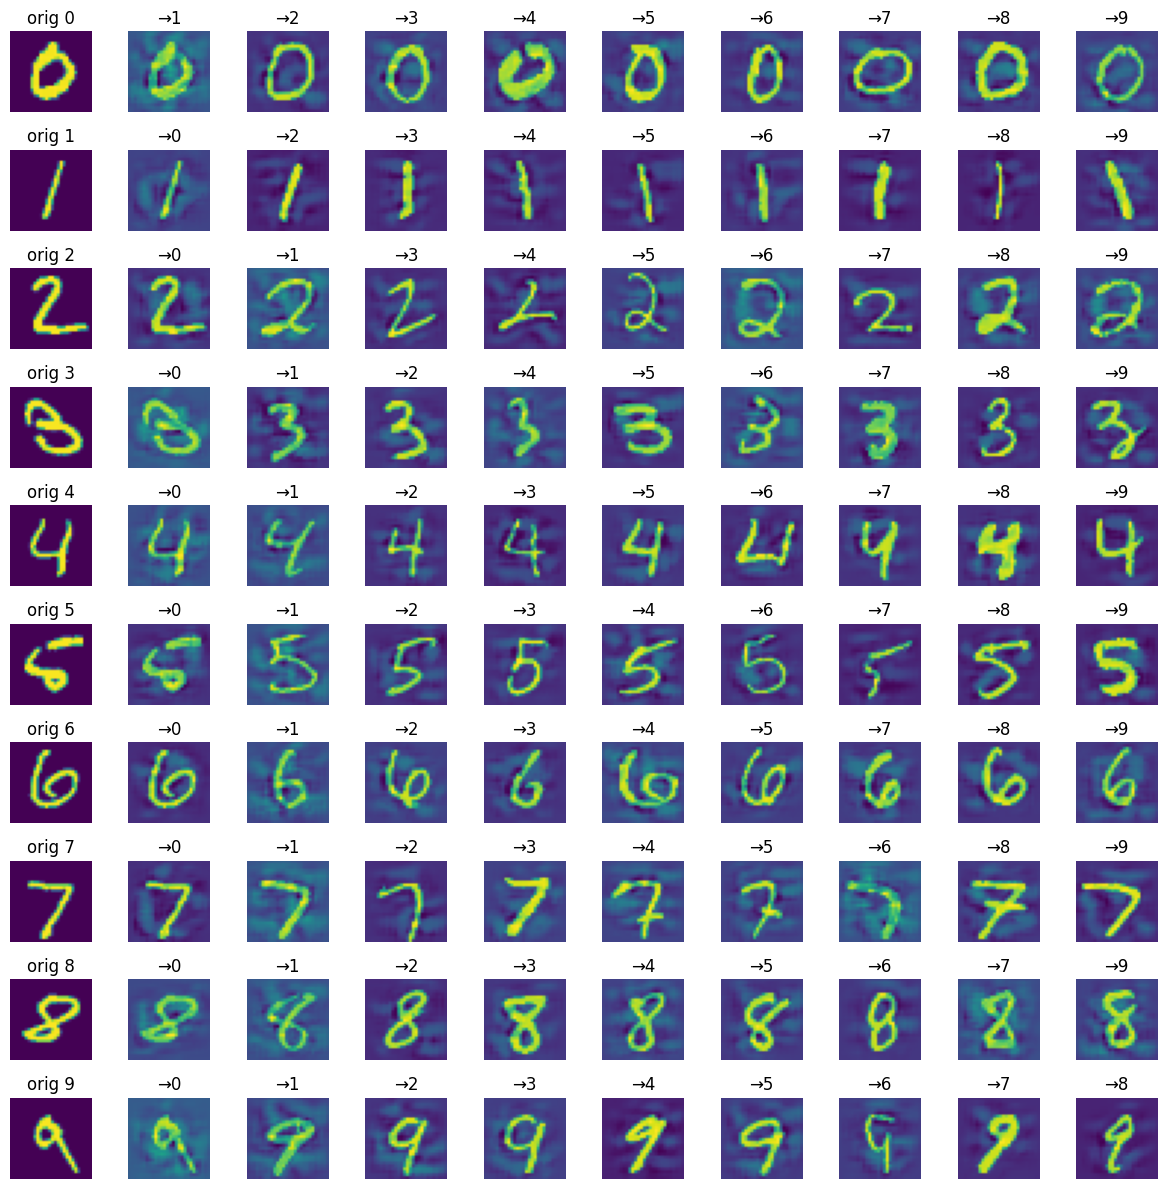

Finished training with lambda = 0.1
Training with lambda = 1.0
iter 000  misclas. rate =  0.0%   loss=11.901
iter 100  misclas. rate = 100.0%   loss=0.163
iter 200  misclas. rate = 100.0%   loss=0.083
iter 300  misclas. rate = 100.0%   loss=0.071
iter 400  misclas. rate = 100.0%   loss=0.068
iter 500  misclas. rate = 100.0%   loss=0.066
iter 600  misclas. rate = 100.0%   loss=0.066
iter 700  misclas. rate = 100.0%   loss=0.065
iter 800  misclas. rate = 100.0%   loss=0.065
iter 900  misclas. rate = 100.0%   loss=0.065

Final attack success rate: 100.0%


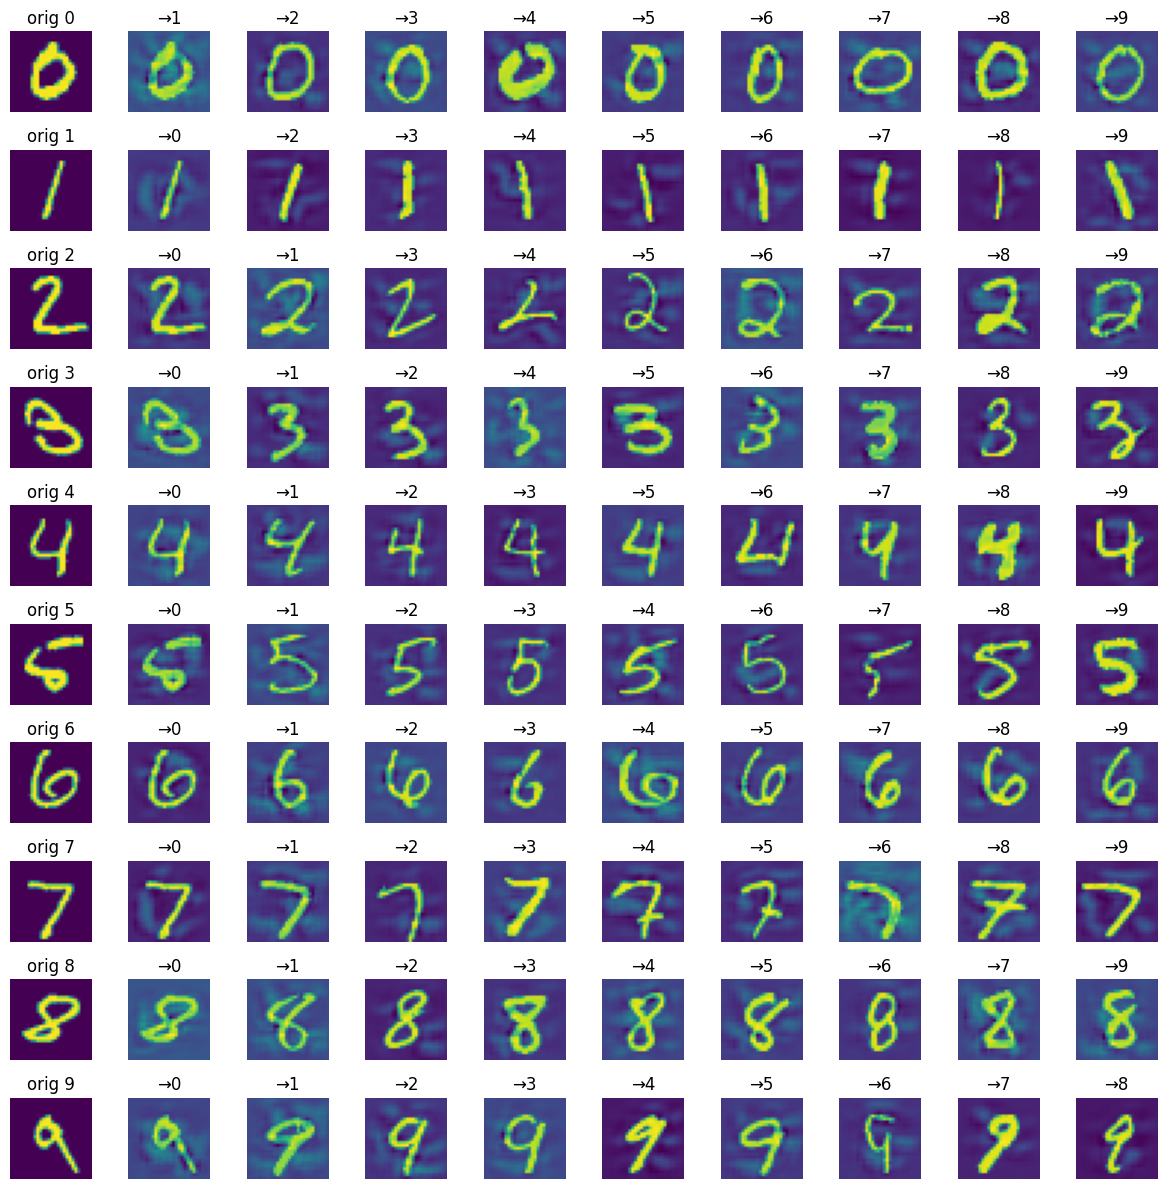

Finished training with lambda = 1.0
Training with lambda = 10.0
iter 000  misclas. rate =  0.0%   loss=11.901
iter 100  misclas. rate = 100.0%   loss=0.506
iter 200  misclas. rate = 100.0%   loss=0.491
iter 300  misclas. rate = 100.0%   loss=0.489
iter 400  misclas. rate = 100.0%   loss=0.489
iter 500  misclas. rate = 100.0%   loss=0.489
iter 600  misclas. rate = 100.0%   loss=0.488
iter 700  misclas. rate = 100.0%   loss=0.488
iter 800  misclas. rate = 100.0%   loss=0.488
iter 900  misclas. rate = 100.0%   loss=0.488

Final attack success rate: 100.0%


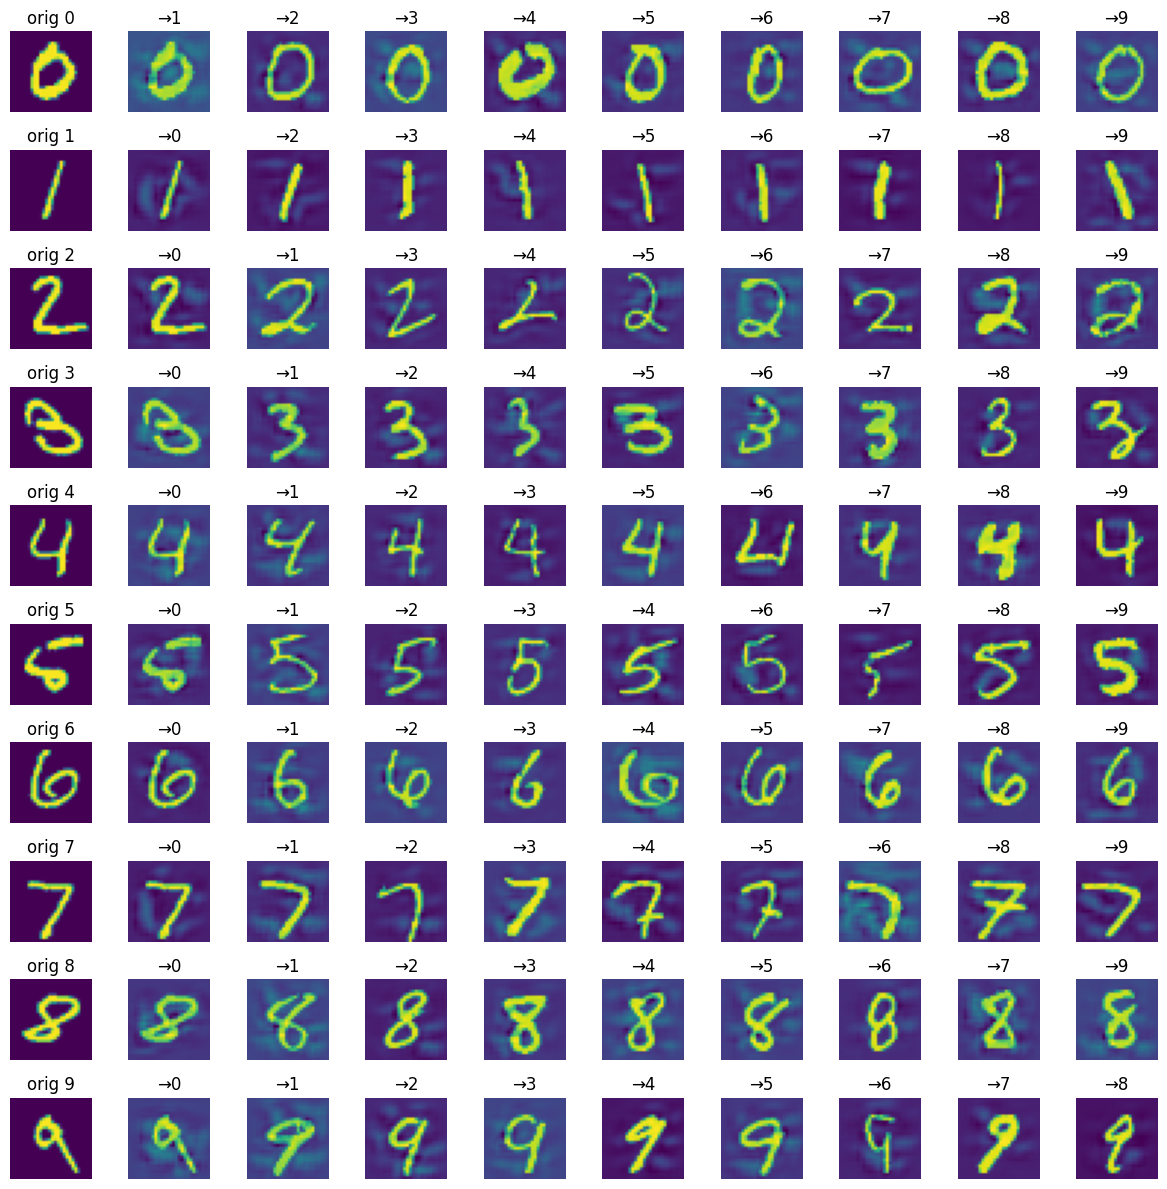

Finished training with lambda = 10.0


In [12]:
# Load 90 images.
picked = {i: [] for i in range(10)}
for img, lbl in testloader:
    c = lbl.item()
    img = img.squeeze(0)            # (1,1,28,28) --> (1,28,28)
    if len(picked[c]) < 9:
        picked[c].append(img)
    if all(len(picked[i]) == 9 for i in range(10)):
        break

originals = torch.cat([torch.stack(picked[i]) for i in range(10)], dim=0).to(device)  # (90,1,28,28)

# Build target‐label vector: for each true class i, nine wrong labels.
target = []
for true in range(10):
    wrongs = [j for j in range(10) if j != true]
    target += wrongs
target = torch.tensor(target, device=device, dtype=torch.long)  # (90,)

# Function for optimizing noises.
def train2(l, iterations):
  delta = torch.zeros_like(originals, requires_grad=True)
  opt = torch.optim.Adam([delta], lr=5e-2)
  for it in range(iterations):
    opt.zero_grad()
    logits = net(originals+delta)
    loss = F.cross_entropy(logits, target) + l * delta.pow(2).mean()
    loss.backward()
    opt.step()

    if it % 100 == 0:
        with torch.no_grad():
            preds = net(originals+delta).argmax(dim=1)
            acc   = (preds == target).float().mean().item()
        print(f"iter {it:03d}  misclas. rate = {acc*100:4.1f}%   loss={loss.item():.3f}")
  return delta

def plot_images2(originals, delta):
  originals_cpu = originals.detach().cpu()
  adv_images  = (originals + delta).detach().cpu()

  fig, axes = plt.subplots(10, 10, figsize=(12,12))
  for true in range(10):
    idx_orig = true * 9
    axes[true, 0].imshow(originals_cpu[idx_orig].squeeze())
    axes[true, 0].set_title(f"orig {true}")
    axes[true, 0].axis('off')
    for k in range(9):
      idx = true * 9 + k
      axes[true, k+1].imshow(adv_images[idx].squeeze())
      axes[true, k+1].set_title(f"→{target[idx].item()}")
      axes[true, k+1].axis('off')

  plt.tight_layout()
  plt.show()

# Train and plot for different lambdas.
iterations = 1000
for l in lambda_values:
    print(f"Training with lambda = {l}")
    delta = train2(l, iterations)
    # Final success rate.
    with torch.no_grad():
      final_preds = net(originals+delta).argmax(dim=1)
      success = (final_preds == target).float().mean().item()
      print(f"\nFinal attack success rate: {success*100:.1f}%")
    plot_images2(originals, delta)
    print(f"Finished training with lambda = {l}")


